In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
# Defining the seed to have same results
np.random.seed(42)

In [2]:
def polynomial(a, x):
    N = len(a)
    S = 0
    for k in range(N):
        S += a[k]*x**k
    return S

In [3]:
def Loss(parameters, X, Y):
 
  # Predictions of our model
    Y_pred = polynomial(parameters, X)
     
    # mse (mean square error)
    L = ((Y_pred - Y)**2).mean()
     
    # Noise in range: [-5, 5]
    noise = 5*np.random.random()
    return L + noise

In [4]:
def grad(L, w, ck):
     
    # number of parameters
    p = len(w)
     
    # bernoulli-like distribution
    deltak = np.random.choice([-1, 1], size=p)
     
    # simultaneous perturbations
    ck_deltak = ck * deltak
 
    # gradient approximation
    DELTA_L = L(w + ck_deltak) - L(w - ck_deltak)
 
    return (DELTA_L) / (2 * ck_deltak)

In [5]:
def initialize_hyperparameters(alpha, lossFunction, w0, N_iterations):
 
    c = 1e-2   # a small number
 
    # A is <= 10% of the number of iterations
    A = N_iterations*0.1
 
    # order of magnitude of first gradients
    magnitude_g0 = np.abs(grad(lossFunction, w0, c).mean())
 
    # the number 2 in the front is an estimative of
    # the initial changes of the parameters,
    # different changes might need other choices
    a = 2*((A+1)**alpha)/magnitude_g0
 
    return a, A, c

In [6]:
def SPSA(LossFunction, parameters, alpha=0.602,\
         gamma=0.101, N_iterations=int(1e5)):
     
    # model's parameters
    w = parameters
 
    a, A, c = initialize_hyperparameters(
      alpha, LossFunction, w, N_iterations)
 
    for k in range(1, N_iterations):
 
        # update ak and ck
        ak = a/((k+A)**(alpha))
        ck = c/(k**(gamma))
 
        # estimate gradient
        gk = grad(LossFunction, w, ck)
 
        # update parameters
        w -= ak*gk
 
    return w

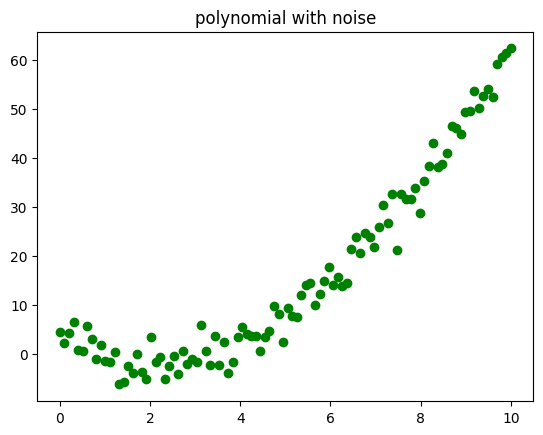

In [7]:
X = np.linspace(0, 10, 100)
Y = 1*X**2 - 4*X + 3
 
noise = 3*np.random.normal(size=len(X))
Y += noise
 
# plot polynomial
plt.title("polynomial with noise")
plt.plot(X, Y, 'go')
plt.show()

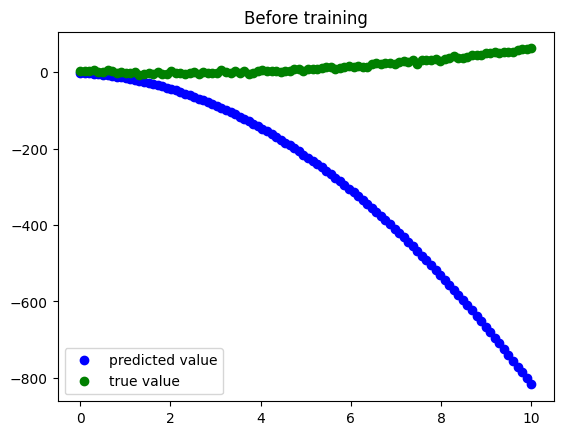

In [8]:
parameters = (2*np.random.random(3) - 1)*10
 
plt.title("Before training")
 
# Compare true and predicted values before
# training
plt.plot(X, polynomial(parameters, X), "bo")
plt.plot(X, Y, 'go')
plt.legend(["predicted value", "true value"])
plt.show()

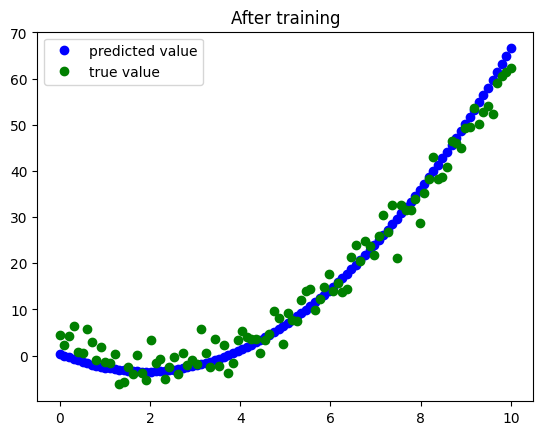

In [9]:
parameters = SPSA(LossFunction = lambda parameters: Loss(parameters, X, Y),
                  parameters = parameters)
 
plt.title("After training")
plt.plot(X, polynomial(parameters, X), "bo")
plt.plot(X, Y, 'go')
plt.legend(["predicted value", "true value"])
plt.show()